## Coulomb's law with discrete point sources


### Coulomb's  law:

$$
{\bf E}({\bf r}) = \frac{1}{4\pi\epsilon_0}\, \sum_i \frac{q_i}{s_i^3}{\bf s}_i,
$$

where ${\bf s} = {\bf r} -{\bf r}^\prime$ is Griffiths script-r vector from source point for $q_i$ 
(${\bf r}^\prime)$ to the observation point ${\bf r}$.
The expressions for $dq$ for one-, two-, and three-dimensional charge distributions are
$$
dq = \lambda({\bf r}^\prime)\, dl^\prime\quad\quad dq = \sigma({\bf r}^\prime)\,  da^\prime \quad\quad 
dq = \rho({\bf r}^\prime)\, d\tau^\prime
$$
respectively.

It is convenient to work with dimensionless parameters defined in terms of some characteristic length
$R$ and charge $Q$ characterizing the source:

$$
{\bf r}^\ast \equiv \frac{\bf r}{R} \quad\quad 
{\bf s}^\ast \equiv \frac{\bf s}{R}\quad\quad 
q^\ast\equiv \frac{q}{Q}\quad\quad\mbox{and}
\quad\quad{\bf E}^\ast \equiv \frac{{\bf E}}{Q/(4\pi \epsilon_0 R^2)}.
$$

Coulomb's law for point charges written in terms of these parameters is 

$$ 
{\bf E}^\ast = \sum_i \frac{q^\ast_i}{(s^\ast_i)^3}\, ({\bf s}^\ast)_i
$$

In what follows all calculations will be done with nondimensional variables, and asterisks will be implicit.  The dimensional magnetic 
field can be recovered by multiplying the numerical results below by the factor $Q/(4\pi\epsilon_0 R^2)$.


Marty Ligare, October 2022

In [1]:
import numpy as np

import matplotlib as mpl  
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Simple testing: field of a dipole located at the origin.

For example, consider a positron separated from an an electron by a distance $d$, with the 
positron at 
$$
{\bf r}_{\rm p}^\prime = \frac{d}{2}\, \hat{\bf z}
$$
and the electron at 
$$
{\bf r}_{\rm e}^\prime = -\frac{d}{2}\, \hat{\bf z}.
$$

It's natural to use $d$ as the length scale $R$, and the fundamental charge $e$ as the 
charge scale $Q$.

#### Information about sources
Format: Each array in <code>qs</code> gives the [charge, x-position, y-position, z-position] of one of the 
point sources, i.e.,

<code>qs = [[q_0, x_0, y_0, z_0], [q_1, x_1, y_1, z_1], ... ]</code>

### Definition of functions with components as arguments (to facilitate broadcasting over meshgrid)

In [3]:
def ex_1(q,x,y,z,xp,yp,zp):
    '''x-component of field at (x,y,z) due to single point charge q at (xp, yp, zp).
    sx, sy, sz are components of vector separation between observation point and 
    source point'''
    sx = x - xp
    sy = y - yp
    sz = z - zp
    return q*sx/(sx**2 + sy**2 + sz**2)**(3/2)

def ey_1(q,x,y,z,xp,yp,zp):
    '''y-component of field at (x,y,z) due to single point charge q at (xp, yp, zp).
    sx, sy, sz are components of vector separation between observation point and 
    source point'''
    sx = x - xp
    sy = y - yp
    sz = z - zp
    return q*sy/(sx**2 + sy**2 + sz**2)**(3/2)
    
def ez_1(q,x,y,z,xp,yp,zp):
    '''z-component of field at (x,y,z) due to single point charge q at (xp, yp, zp).
    sx, sy, sz are components of vector separation between observation point and 
    source point'''
    sx = x - xp
    sy = y - yp
    sz = z - zp
    return q*sz/(sx**2 + sy**2 + sz**2)**(3/2)

def ex_tot(x,y,z):
    '''x component of total field due to all point sources'''
    sum = 0
    for i in range(len(qs)):
        q = qs[i,0]
        xp = qs[i,1]
        yp = qs[i,2]
        zp = qs[i,3]
        sum += ex_1(q,x,y,z,xp,yp,zp)
    return sum

def ey_tot(x,y,z):
    '''y component of total field due to all point sources'''
    sum = 0
    for i in range(len(qs)):
        q = qs[i,0]
        xp = qs[i,1]
        yp = qs[i,2]
        zp = qs[i,3]
        sum += ey_1(q,x,y,z,xp,yp,zp)
    return sum

def ez_tot(x,y,z):
    '''z component of total field due to all point sources'''
    sum = 0
    for i in range(len(qs)):
        q = qs[i,0]
        xp = qs[i,1]
        yp = qs[i,2]
        zp = qs[i,3]
        sum += ez_1(q,x,y,z,xp,yp,zp)
    return sum

### Simple testing: field of a dipole located at the origin.

For example, consider a positron separated from an an electron by a distance $d$, with the 
positron at 
$$
{\bf r}_{\rm p}^\prime = \frac{d}{2}\, \hat{\bf z}
$$
and the electron at 
$$
{\bf r}_{\rm e}^\prime = -\frac{d}{2}\, \hat{\bf z}.
$$

It's natural to use $d$ as the length scale $R$, and the fundamental charge $e$ as the 
charge scale $Q$.  

#### The source array for the dipole is then:

In [4]:
qs = np.array([[1,0,0,0.5],[-1,0,0,-0.5]])

#### Dimensionless field at origin

In [5]:
ex_tot(0,0,0), ey_tot(0,0,0), ez_tot(0,0,0)

(0.0, 0.0, -8.0)

#### Field at origin with dimensions

To get from the dimesionless field to a field with dimensions, we just multiply by the field scaling 
factor:
\begin{eqnarray*}
{\bf E} &=& {\bf E}^\ast\times \frac{1}{4\pi\epsilon_0}\frac{Q}{R^2} \\
        &=& -8\, \hat{\bf z}\times\, \frac{1}{4\pi\epsilon_0}\frac{e}{d^2} \\
        &=& -\frac{2}{\pi\epsilon_0}\frac{e}{d^2}\, \hat{\bf z}
\end{eqnarray*}
It's not hard to verify "by hand" that this is correct.

#### Plot showing sources and field vector at a single point

<IPython.core.display.Javascript object>


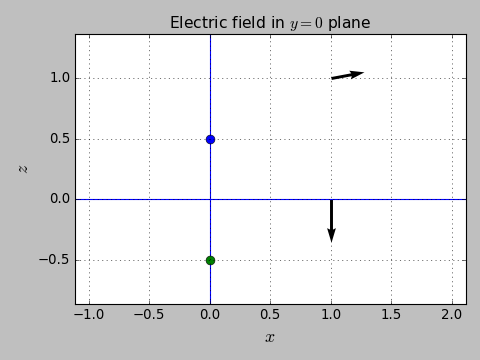

In [6]:
x1 = 1.0
y1 = 0
z1 = 0

x2 = 1.0
y2 = 0
z2 = 1.0

plt.figure()
plt.axis('equal')
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.title('Electric field in $y=0$ plane')
plt.axhline(0)
plt.axvline(0)
plt.quiver(x1, z1, ex_tot(x1,y1,z1), ez_tot(x1,y1,z1), scale=2, scale_units='xy')
plt.quiver(x2, z2, ex_tot(x2,y2,z2), ez_tot(x2,y2,z2), scale=2, scale_units='xy')

for i in range(len(qs)):
    q = qs[i,0]
    cx = qs[i,1]
    cy = qs[i,3]
    plt.plot(cx, cy, marker="o", markersize = 8)

plt.xlim(-0.5,1.5)
plt.ylim(-1,1.5)
plt.grid();


#### Create grid of points, and evaluate field components at those points

In [7]:
x = np.linspace(-2,2,5)
y = 0
z = np.linspace(-2,2,5)
X, Z = np.meshgrid(x,z)
U = ex_tot(X,0,Z)
V = ey_tot(X,0,Z)
W = ez_tot(X,0,Z)

In [8]:
X, Z

(array([[-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.]]),
 array([[-2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.]]))

In [9]:
U, W

(array([[ 0.06705414,  0.11945068,  0.        , -0.11945068, -0.06705414],
        [ 0.10026882,  0.54486477,  0.        , -0.54486477, -0.10026882],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.10026882, -0.54486477,  0.        ,  0.54486477,  0.10026882],
        [-0.06705414, -0.11945068,  0.        ,  0.11945068,  0.06705414]]),
 array([[ 0.01981768,  0.12794972,  0.28444444,  0.12794972,  0.01981768],
        [-0.03893279,  0.1017554 ,  3.55555556,  0.1017554 , -0.03893279],
        [-0.11413441, -0.71554175, -8.        , -0.71554175, -0.11413441],
        [-0.03893279,  0.1017554 ,  3.55555556,  0.1017554 , -0.03893279],
        [ 0.01981768,  0.12794972,  0.28444444,  0.12794972,  0.01981768]]))

### Plot of field arrows in $y=0$ plane dominated by field arrow at the origin; most vectors too small to see and detail

<IPython.core.display.Javascript object>


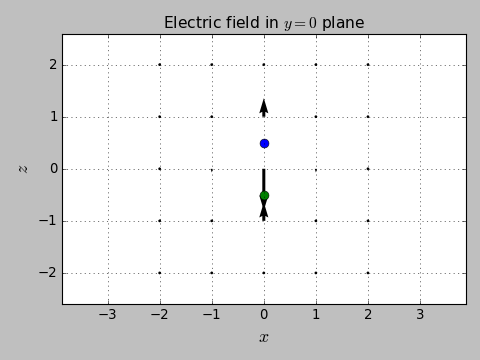

In [9]:
plt.figure()
plt.axis('equal')
plt.quiver(X, Z, U, W, scale=10, scale_units='xy')
plt.xlim(-2.5, 2.5)
plt.ylim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.title('Electric field in $y=0$ plane')

for i in range(len(qs)):
    q = qs[i,0]
    cx = qs[i,1]
    cy = qs[i,3]
    plt.plot(cx, cy, marker="o", markersize = 8)
    
plt.grid();

#### Remove arrow at origin and reduce value of <code>scale</code> parameter

In [10]:
W[2,2]

-8.0

In [11]:
W[2,2] = 0

<IPython.core.display.Javascript object>


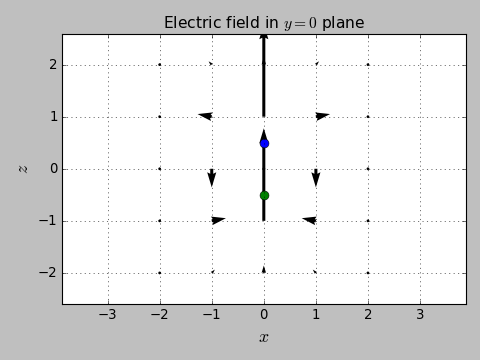

In [12]:
plt.figure()
plt.axis('equal')
plt.quiver(X, Z, U, W, scale=2, scale_units='xy')
plt.xlim(-2.5,2.5)
plt.ylim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$z$')
plt.title('Electric field in $y=0$ plane')

for i in range(len(qs)):
    q = qs[i,0]
    cx = qs[i,1]
    cy = qs[i,3]
    plt.plot(cx, cy, marker="o", markersize = 8)
    
plt.grid();

### Version Information 
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [13]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

In [14]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.13 64bit [GCC 7.5.0]
IPython 7.31.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.21.5
scipy 1.7.3
matplotlib 3.5.2
Mon Nov 14 13:49:53 2022 EST